In [1]:
import numpy as np
import pandas as pd 
import scipy.stats 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,7

# Задание
### Цель:
изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

Описание задания:

В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. 

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная.

Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.

### Этапы работы:

Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
Проведите первичный анализ.

Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками
Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

Преобразуйте категориальные признаки.
Разделите выборку на обучающее и тестовое подмножество.
80% данных оставить на обучающее множество, 20% на тестовое.
Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.

Сформулируйте выводы по проделанной работе.

Кратко опишите какие преобразования были сделаны с данными.

Сравните точность двух моделей.

Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?

In [3]:
adult = pd.read_csv('adult.csv')
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
adult.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
adultVis = pd.get_dummies(adult, columns=['income'], drop_first= True)
adultVis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income_>50K      48842 non-null  uint8 
dtypes: int64(6), object(8), uint8(1)
memory usage: 5.3+ MB


Text(0.5, 1.0, 'Тепловая карта')

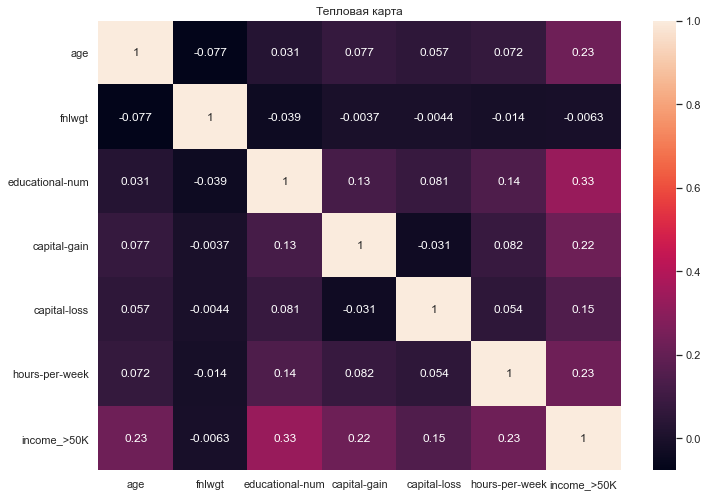

In [7]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(adultVis.corr(), annot=True)
plt.title('Тепловая карта')

In [8]:
adult['workclass'].value_counts() # количество значений признака

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [9]:
adult['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [10]:
adult['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

Признаки 'workclass' & 'occupation' & 'native-country' содержат пропуски.
Можно либо удалить строки с пропусками, потеряем данные при этом.
Либо заменим модой.
Либо вообще уберем все признаки нечислового типа из модели.
Попробую варианты и сравню результаты работы моделей.

In [11]:
# заменю пропуски на NaN, чтобы затем применить fillna

adult['workclass'] = adult['workclass'].replace('?', np.nan)
adult['occupation'] = adult['occupation'].replace('?', np.nan)
adult['native-country'] = adult['native-country'].replace('?', np.nan)
adult.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [12]:
adult.isna().mean() * 100 # количество пропусков в процентах. Имеем три признака с пропусками

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [13]:
adultDrop = adult.copy() # создам копию, удалю строки с NaN
adultDrop = adultDrop.dropna()
adultDrop.describe() # метрики изменились после удаления строк. 

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
X = pd.get_dummies(adultDrop, columns=['workclass', 'education', 'marital-status', 'occupation',
                                        'relationship', 'race', 'gender', 'native-country'])
# преобразование категориальных переменных в числа
del X['income'] # целевая переменная, удаляю

X.head(1)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
target_col = adultDrop['income']

In [16]:
y = pd.get_dummies(target_col, columns=['income'], drop_first= True )

### Обучение adultDrop

In [17]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [20]:
predictions[:10] # посмотрим как выглядят наши предсказания

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [21]:
%timeit model.predict(X_test) # получаем массив

27.2 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [22]:
model.predict_proba(X_test)

array([[0.99826206, 0.00173794],
       [0.93456987, 0.06543013],
       [0.57093291, 0.42906709],
       ...,
       [0.78730114, 0.21269886],
       [0.83177089, 0.16822911],
       [0.99187287, 0.00812713]])

#### точность предсказания на обучающей и тестовой выборках для adultDrop

In [23]:
adultDrop_train_score = model.score(X_train, y_train) 
adultDrop_train_score

0.8485778256903558

In [24]:
adultDrop_test_score = model.score(X_test,y_test)
adultDrop_test_score

0.8509673852957435

#### Теперь заменю пропуски модой

In [25]:
adultMode = adult.copy() # создам копию, далее NaN заменю модой
adultMode['workclass'] = adultMode['workclass'].fillna(adultMode['workclass'].mode()[0])
adultMode['occupation'] = adultMode['occupation'].fillna(adultMode['occupation'].mode()[0])
adultMode['native-country'] = adultMode['native-country'].fillna(adultMode['native-country'].mode()[0])
adultMode.describe() # метрики не поменялись от исходного df, потому что оперировали над типом данных object

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [26]:
X = pd.get_dummies(adultMode, columns=['workclass', 'education', 'marital-status', 'occupation',
                                        'relationship', 'race', 'gender', 'native-country'])
# преобразование категориальных переменных в числа
del X['income'] # целевая переменная, удаляю

X.head(1)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [27]:
target_col = adultMode['income']

In [28]:
# записываем в таргетную переменную y преобразованный столбец income

y = pd.get_dummies(target_col, columns=['income'], drop_first= True )


In [29]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

### Обучение adultMode

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

In [31]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [32]:
model.predict(X_test) # получаем массив

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [33]:
model.predict_proba(X_test)

array([[0.43083616, 0.56916384],
       [0.98353672, 0.01646328],
       [0.98982215, 0.01017785],
       ...,
       [0.9670716 , 0.0329284 ],
       [0.98169064, 0.01830936],
       [0.71116141, 0.28883859]])

#### точность предсказания на обучающей и тестовой выборках для adultMode

In [34]:
adultMode_train_score = model.score(X_train, y_train) 
adultMode_train_score

0.8527627773654441

In [35]:
adultMode_test_score = model.score(X_test,y_test)
adultMode_test_score

0.8495240045040434

#### Теперь уберем все признаки нечислового типа

In [36]:
adultNumb = adult.copy() # создам копию, далее уберем нечисловые признаки
X = adultNumb.select_dtypes(exclude=['object'])
X.head(1)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40


In [37]:
y = adultNumb['income'].map({'<=50K':0, '>50K':1}).values
y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [38]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

### Обучение adultNumb

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [40]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [41]:
model.predict(X_test) # получаем массив

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
model.predict_proba(X_test)

array([[0.61015517, 0.38984483],
       [0.8836496 , 0.1163504 ],
       [0.92760008, 0.07239992],
       ...,
       [0.91012135, 0.08987865],
       [0.79059559, 0.20940441],
       [0.92682191, 0.07317809]])

#### точность предсказания на обучающей и тестовой выборках для adultNumb

In [43]:
adultNumb_train_score = model.score(X_train, y_train) 
adultNumb_train_score

0.8145010621145036

In [44]:
adultNumb_test_score = model.score(X_test,y_test)
adultNumb_test_score

0.8162555020984748

### Метод опорных векторов. SVM

Для реализации метода Опорных векторов возьму обработанный df adultMode, так как считаю способ замены пропусков модой более качественным с точки зрения сохранности исходных данных

In [45]:
adultMode.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K


In [46]:
# используем пайплайны
clf = make_pipeline(StandardScaler(), SVC()) 
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [47]:
adultMode_SVC_train_score = clf.score(X_train, y_train) 

In [48]:
adultMode_SVC_test_score =clf.score(X_test, y_test)

### Точности предсказаний

In [49]:
print('adultDrop_train_score = ', adultDrop_train_score)
print('adultDrop_test_score = ', adultDrop_test_score)
print(' ')
print('adultMode_train_score = ', adultMode_train_score)
print('adultMode_test_score = ', adultMode_test_score)
print(' ')
print('adultNumb_train_score = ', adultNumb_train_score)
print('adultNumb_test_score = ', adultNumb_test_score)
print(' ')
print('adultMode_SVC_train_score = ', adultMode_SVC_train_score)
print('adultMode_SVC_test_score = ', adultMode_SVC_test_score)


adultDrop_train_score =  0.8485778256903558
adultDrop_test_score =  0.8509673852957435
 
adultMode_train_score =  0.8527627773654441
adultMode_test_score =  0.8495240045040434
 
adultNumb_train_score =  0.8145010621145036
adultNumb_test_score =  0.8162555020984748
 
adultMode_SVC_train_score =  0.827016098072838
adultMode_SVC_test_score =  0.8265943289998976


#### Вывод:
Методы подготовки данных при помощи удаления пропусков и замены модой показали примерно одинаковые результаты.

Предполагаю, если бы пропусков было больше чем прмерно 7 %, то метод с удалением строк с пропусками показал бы худшие результаты, нежели с восстановлением пропусков.

Хуже по качеству предсказание с помощью метода опорных векторов.
Кроме меньшей точности, данный метод весьма трудозатратен, - процедура выполнялась примерно 4 минуты. Это в сотни раз дороже, чем работа Логистической регрессии.

И в конце рейтинга качества метод исключения нечисловых признаков. 

Как повысить качество:

Возможно, увеличением выборки, проведением предварительного анализа связей признаков внутри групп, отсеивание малозначимых признаков, удаление выбросов.. 